# Diabetes (clustering)
다음의 당뇨 데이터의 혈압, 당뇨진행 정도 데이터를 이용하여 군집화(clustering)하여라.
1. sklearn을 이용하지 않고 (자신의 코드로)
2. sklearn을 이용해서
3. cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라. 

In [1]:
from sklearn import datasets

In [2]:
diabetes=datasets.load_diabetes()

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

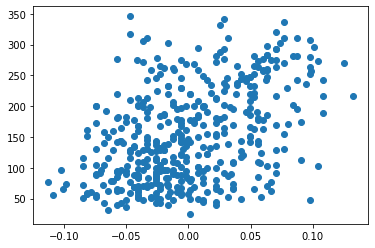

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X_p=diabetes.data[:,3] # 혈압
X_d = diabetes.target # 당뇨 진행 정도
plt.plot(X_p,X_d,'o')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as sk
from sklearn.preprocessing import StandardScaler
import random

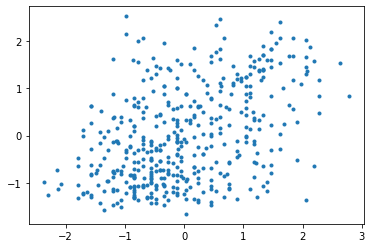

In [7]:
X=np.array([X_p,X_d]).transpose()
scaler=StandardScaler()
X=scaler.fit_transform(X)
plt.plot(X[:,[0]],X[:,[1]],'.')
plt.show()

# 1 sklearn 없이

[0.44128039 0.96789118] [-0.34837925 -0.76412462]


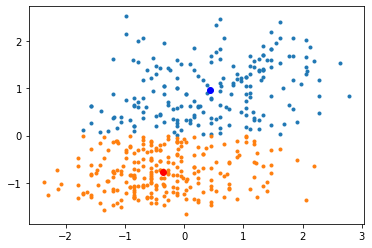

In [8]:
group1=np.array([X[i] for i in np.where(X[:,1]>0)[0]])
group2=np.array([X[i] for i in np.where(X[:,1]<0)[0]])
centroid1=np.mean(group1,axis=0)
centroid2=np.mean(group2,axis=0)
print(centroid1,centroid2)
fig,ax=plt.subplots()
ax.plot(group1[:,0],group1[:,1],'.')
ax.plot(group2[:,0],group2[:,1],'.')
ax.plot(centroid1[0],centroid1[1],'bo')
ax.plot(centroid2[0],centroid2[1],'ro')
plt.show()

In [9]:
def mycode(X,centroid1,centroid2,iterations):
    labels=np.zeros(len(X))
    for iteration in range(iterations):
        a=np.linalg.norm(X-centroid1,axis=1)
        b=np.linalg.norm(X-centroid2,axis=1)
        group1=np.array([X[i] for i in np.where((a-b)<0)[0]])
        group2=np.array([X[i] for i in np.where((a-b)>0)[0]])
        centroid1=np.mean(group1,axis=0)
        centroid2=np.mean(group2,axis=0)
        
        fig,ax=plt.subplots()
        ax.plot(group1[:,0],group1[:,1],'.')
        ax.plot(group2[:,0],group2[:,1],'.')
        ax.plot(centroid1[0],centroid1[1],'bo')
        ax.plot(centroid2[0],centroid2[1],'ro')
        plt.show()
    return group1,group2,centroid1,centroid2  

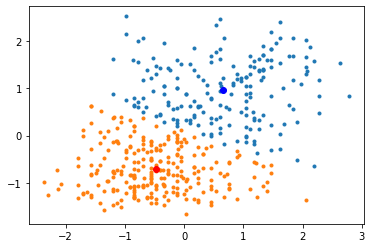

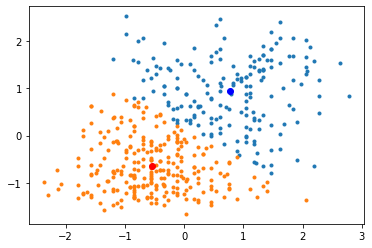

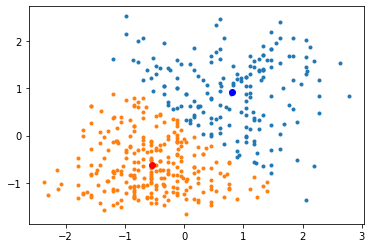

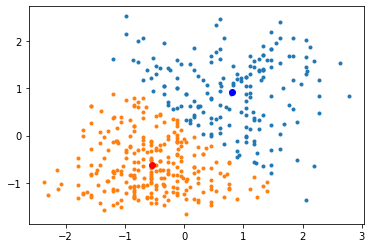

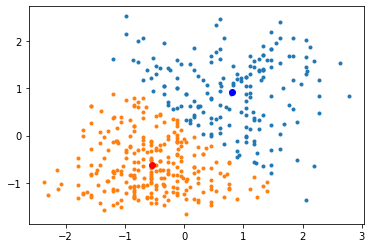

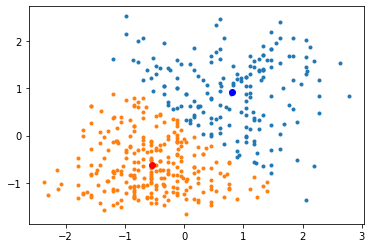

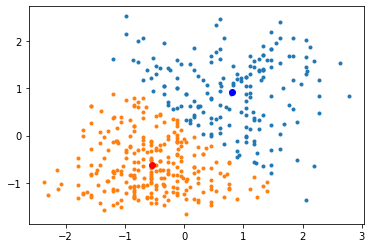

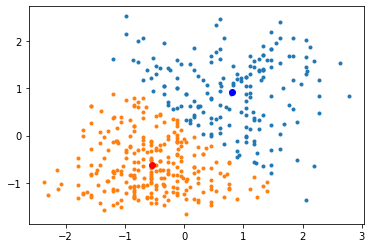

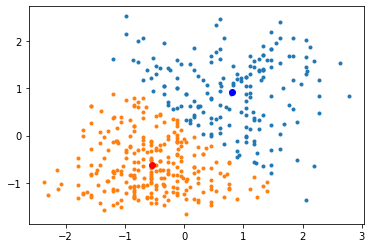

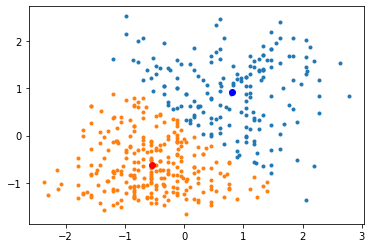

In [10]:
g1,g2,c1,c2=mycode(X,centroid1,centroid2,10)

In [11]:
print(c1,c2)

[0.81470253 0.92676871] [-0.54930701 -0.62486678]


# 2.1 Kmean  (inertia를 확인하며 클러스터 수 결정) 

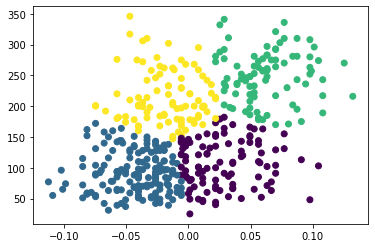

In [12]:
kmeans = sk.KMeans(n_clusters = 4)
kmeans.fit(X)
plt.scatter(X_p,X_d,c=kmeans.labels_)
plt.show()

D:\Anaconda\envs\neuro\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


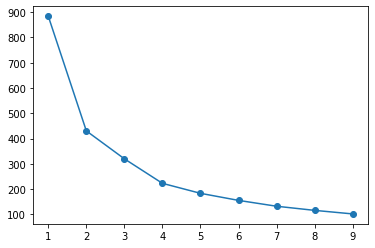

In [13]:
inertia_history=[]
for i in range(1,10):
    kmeans = sk.KMeans(n_clusters = i)
    kmeans.fit(X)
    inertia_history.append(kmeans.inertia_)
plt.plot([i for i in range(1,10)],inertia_history,'o-')
plt.show()

# 2.2 Agglomerative Clustering

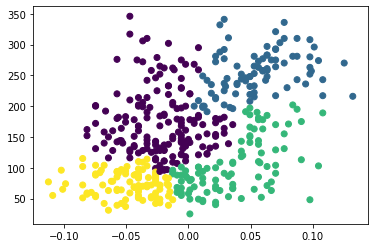

In [14]:
agg=sk.AgglomerativeClustering(n_clusters=4)
agg.fit(X)
plt.scatter(X_p,X_d,c=agg.labels_)
plt.show()

# 2.3 Affinity Propagation

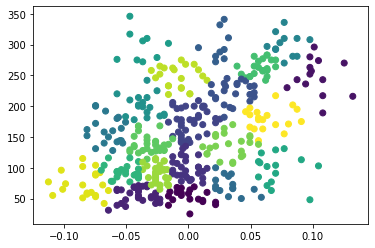

In [15]:
AP = sk.AffinityPropagation()
AP.fit(X)
plt.scatter(X_p,X_d,c=AP.labels_)
plt.show()

# 3 클러스터 수를 결정하는 방법
위에서처럼 inertia 를 확인하며 완만해지는 지점을 이용하는게 타당해 보인다.
